# Install and import libraries

In [23]:
# Install libraries
!pip install -q missingno

# import libraries
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [24]:
# Read the dataset
# dataset_path = "C:\My\Top-up Degree\Data Science\Data Science - Assignment\Data set\Kaggle\Cardiovascular Diseases Risk Prediction Dataset\CVD_cleaned.csv"
data = pd.read_csv(dataset_path)
print("Shape before dropping columns:", data.shape)
display(data.head(n=5))

Shape before dropping columns: (308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.00,32.66,14.54,Yes,0.00,30.00,16.00,12.00
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.00,77.11,28.29,No,0.00,30.00,0.00,4.00
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.00,88.45,33.47,No,4.00,12.00,3.00,16.00
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.00,93.44,28.73,No,0.00,30.00,30.00,8.00
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.00,88.45,24.37,Yes,0.00,8.00,4.00,0.00


## Describing the dataset

In [25]:
data.describe() # print the descriptive statistics

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.10,29.84,15.11,6.30
std,10.66,21.34,6.52,8.20,24.88,14.93,8.58
min,91.00,24.95,12.02,0.00,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.00,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.00,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.00,30.00,20.00,8.00
max,241.00,293.02,99.33,30.00,120.00,128.00,128.00


In [26]:
import pandas as pd
pd.options.display.float_format = ' {:.2f}'.format # set the format for two decimal places
data.describe() # print the descriptive statistics

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.10,29.84,15.11,6.30
std,10.66,21.34,6.52,8.20,24.88,14.93,8.58
min,91.00,24.95,12.02,0.00,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.00,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.00,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.00,30.00,20.00,8.00
max,241.00,293.02,99.33,30.00,120.00,128.00,128.00


## Dataset information

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [29]:
# Get the number of unique values in each column
unique_value_counts = data.nunique()

display(unique_value_counts)

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

In [32]:
# Print the unique values in the column 'Gender'
unique_values = data['Diabetes'].unique()
print(unique_values)

['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']


In [33]:
# Check the number of rows with abnormal data in the Diabetes column
abnormal_count = data[data['Diabetes'].isin(['No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy'])].shape[0]
print(f'There are {abnormal_count} rows with abnormal data in the Diabetes column.')

There are 9542 rows with abnormal data in the Diabetes column.


## Checking missing values

<Axes: >

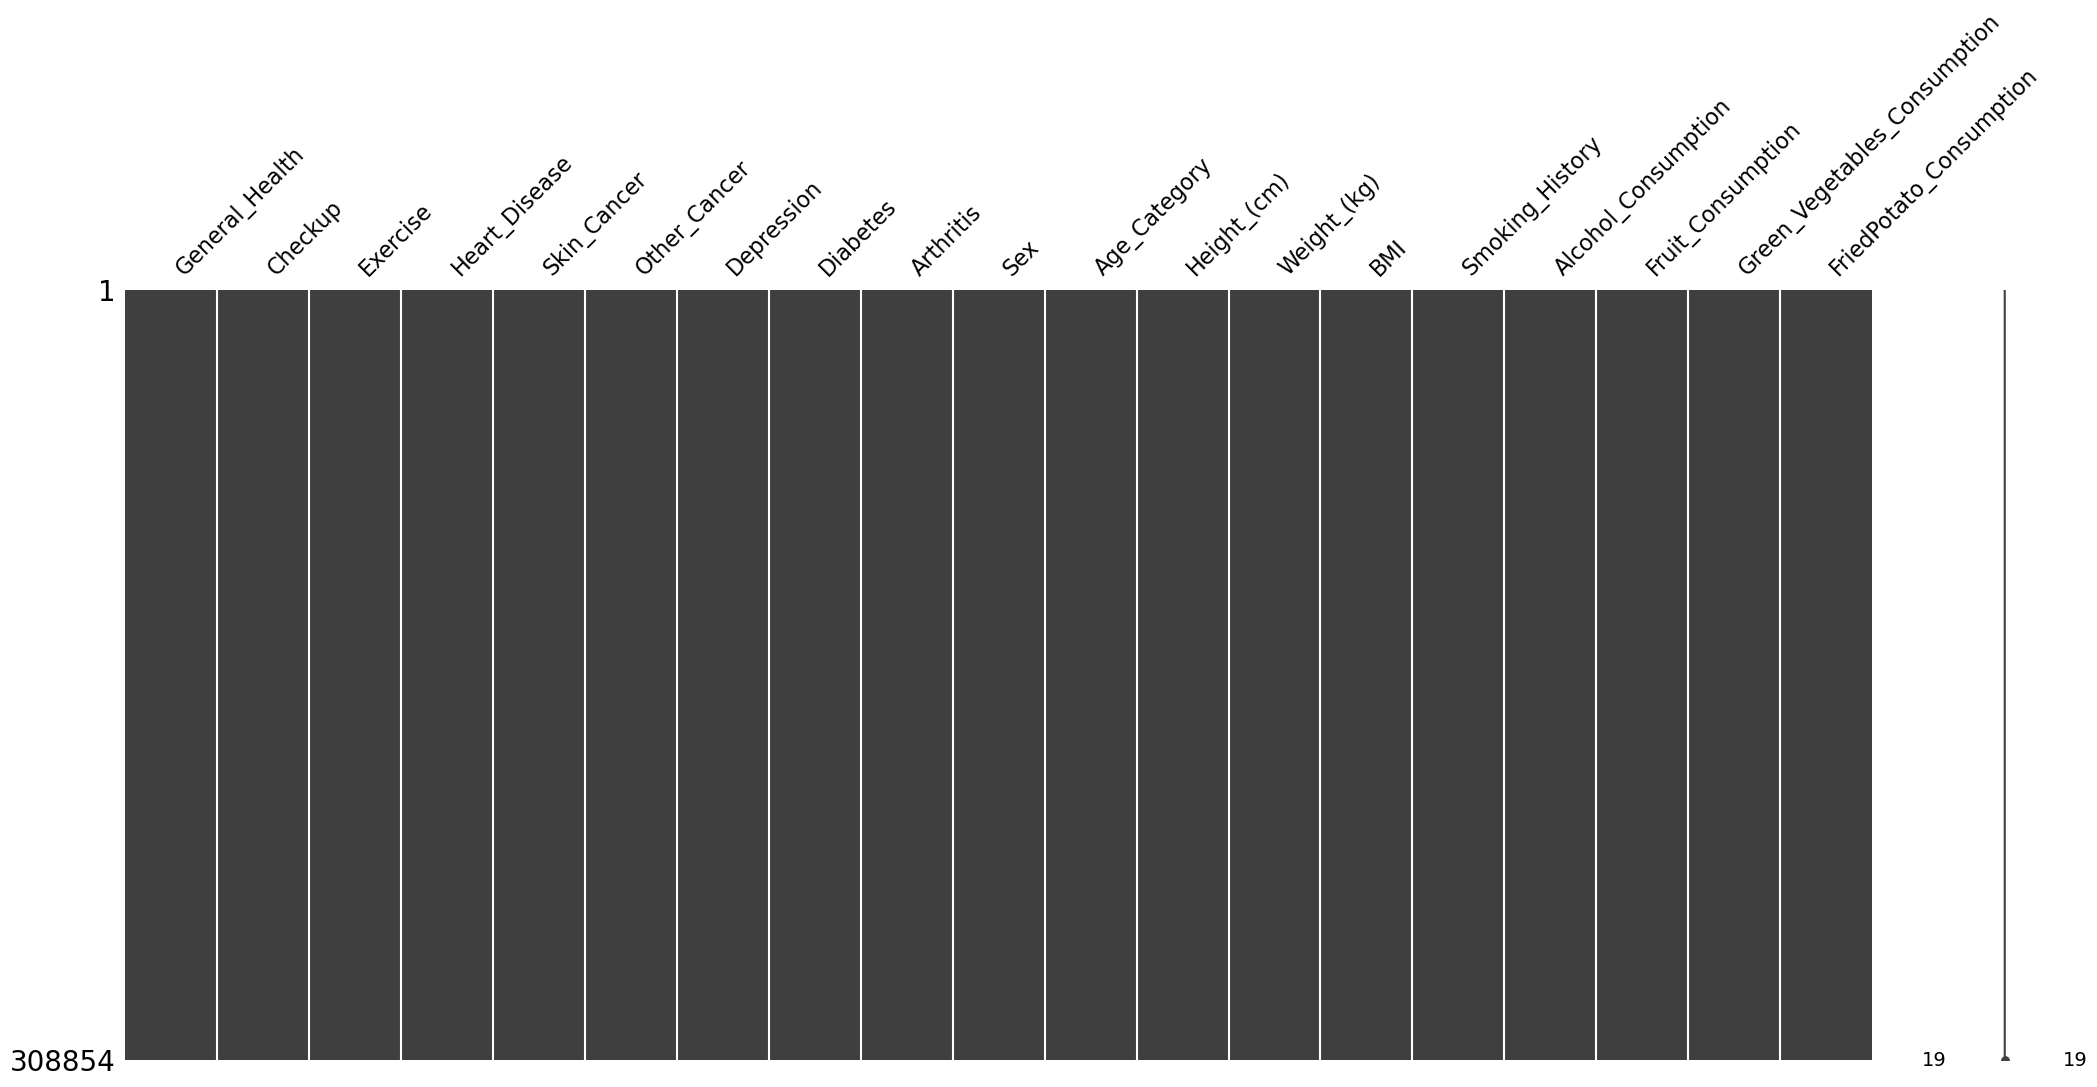

In [6]:
# Plot the missing values matrix
msno.matrix(data)

In [7]:
# Import pandas as pd
import pandas as pd

# Import display from IPython.display
from IPython.display import display

# Calculate the missing data ratio for each column as percentages
missing_data_ratio = data.isnull().mean() * 100

# Convert the Series to a DataFrame for better display
missing_data_df = pd.DataFrame({'Missing Data Ratio (%)': missing_data_ratio})

# Display the missing data ratio for each column as percentages in a scrollable DataFrame
with pd.option_context('display.max_rows', None):
    display(missing_data_df)

,Missing Data Ratio (%)
General_Health,0.00
Checkup,0.00
Exercise,0.00
Heart_Disease,0.00
Skin_Cancer,0.00
Other_Cancer,0.00
Depression,0.00
Diabetes,0.00
Arthritis,0.00
Sex,0.00


## Checking for duplicates

In [13]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


## Checking outliers

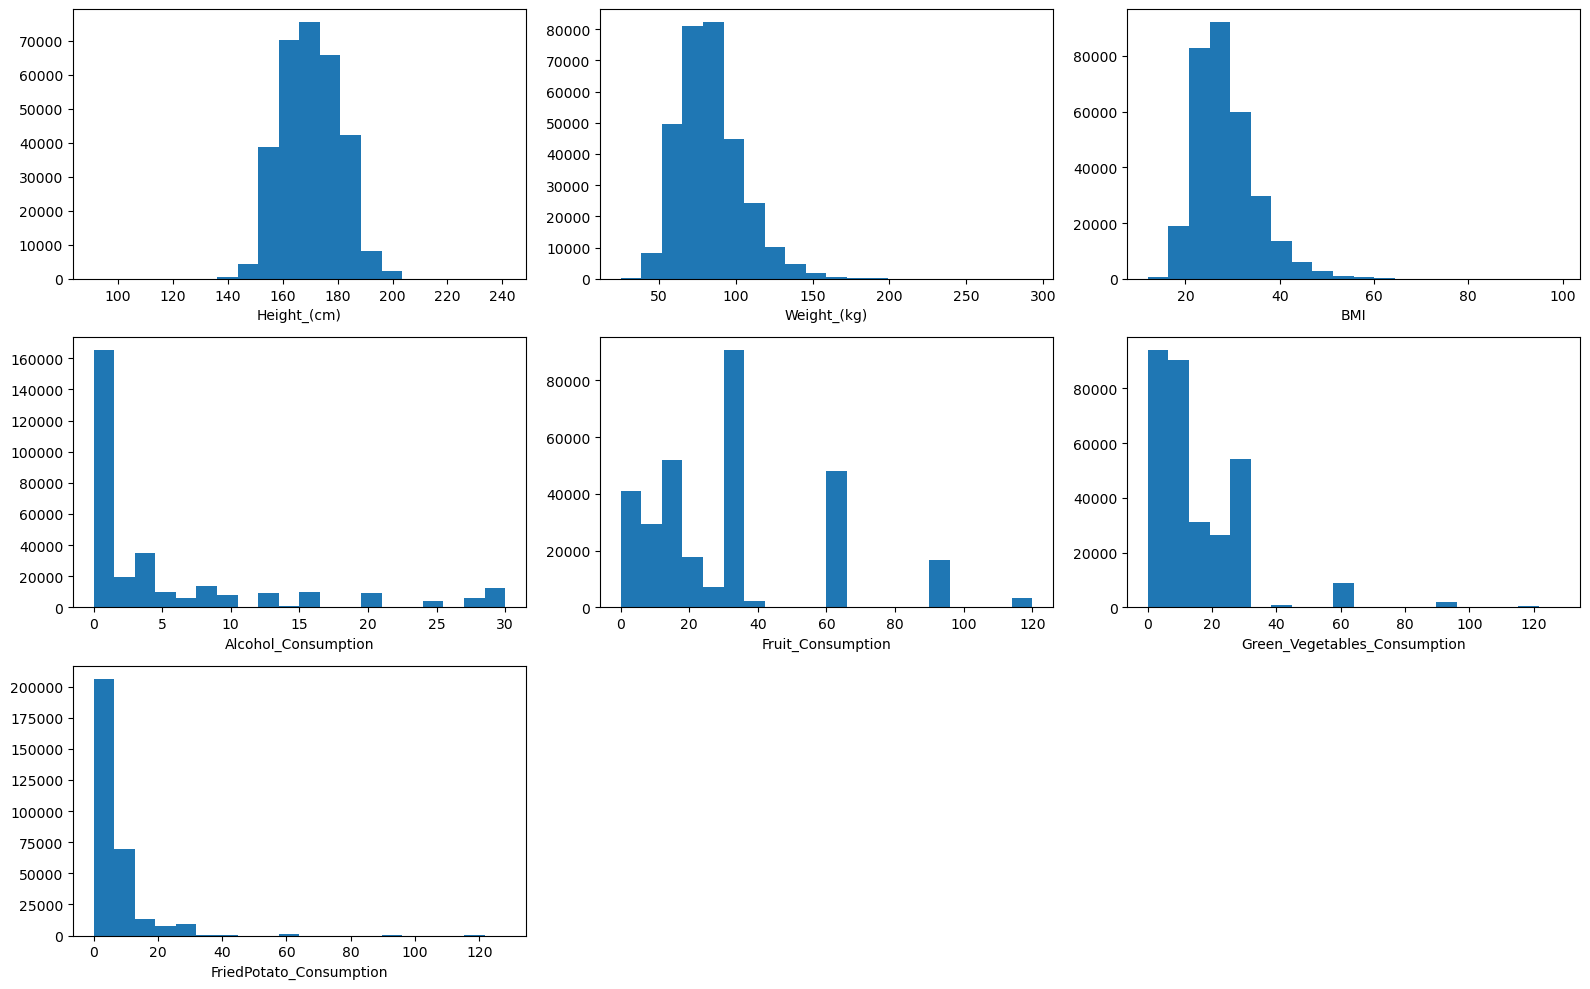

In [14]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# Create histograms
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=20) # Plot a histogram with 20 bins
    plt.xlabel(column) # Add a label for the x-axis

plt.tight_layout() # Adjust the spacing between subplots
plt.show() # Display the plots

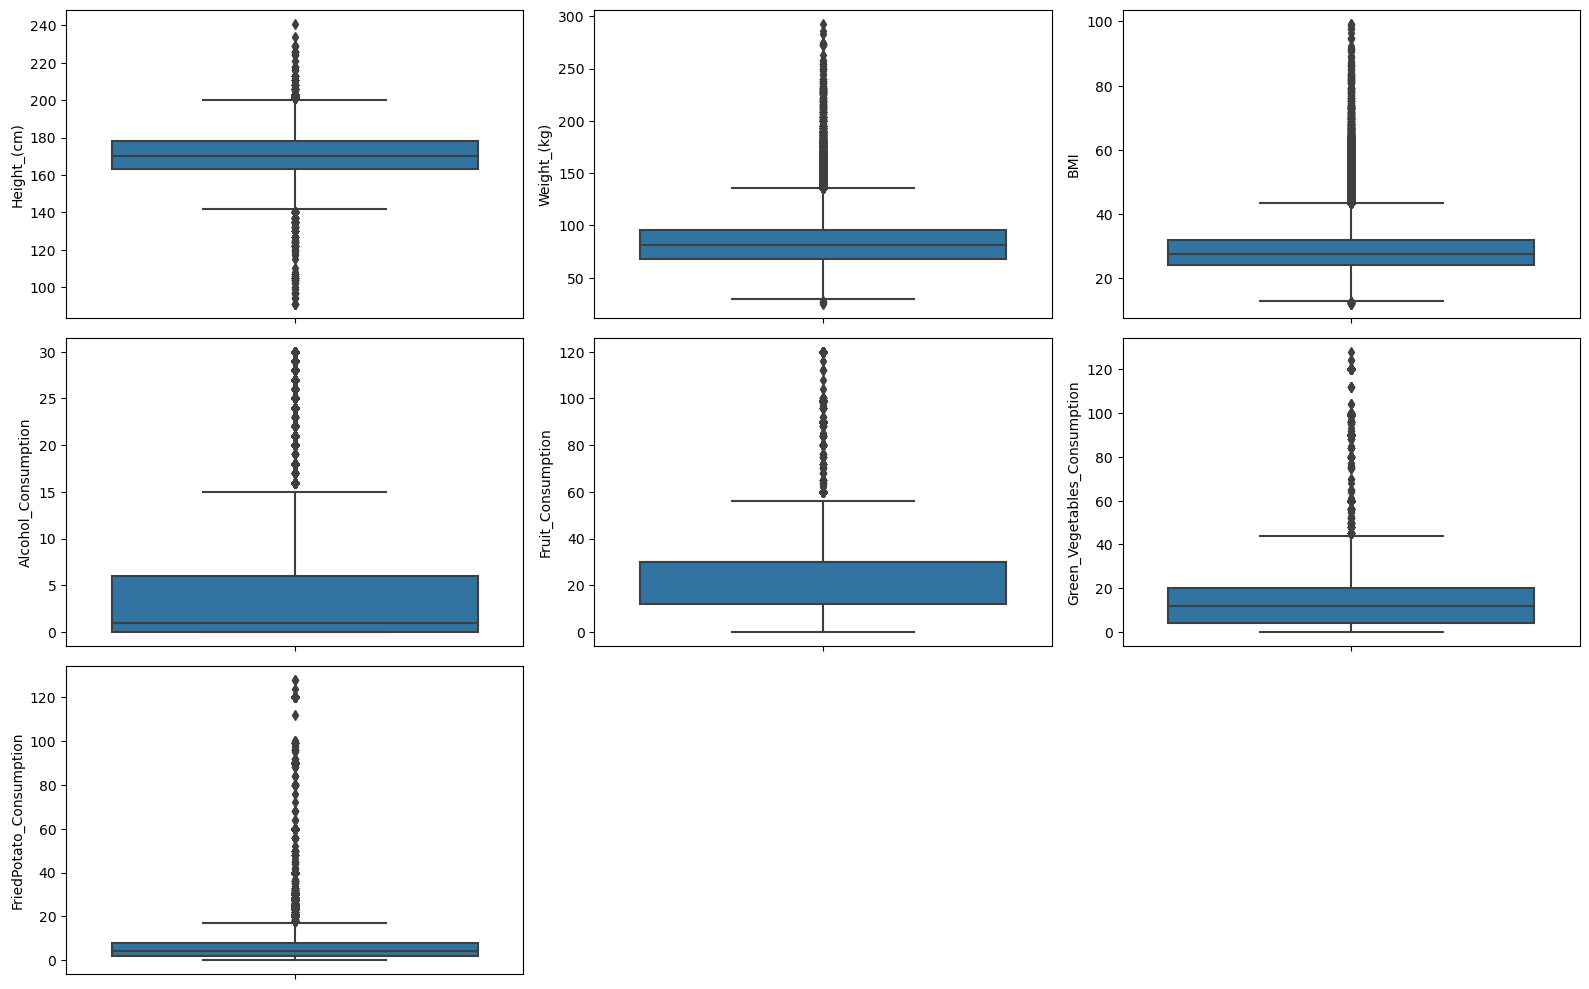

In [16]:
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [31]:
# Import pandas library
import pandas as pd

# Define a function to find outliers using mean and standard deviation
def find_outliers(data, col):
    # Calculate mean and standard deviation
    mean = data[col].mean()
    std = data[col].std()
    # Calculate lower and upper bounds
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    # Filter out the outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    # Return the outliers
    return outliers

# Apply the function to the three variables and store the results in a list
outlier_list = [find_outliers(data, col) for col in ['Height_(cm)', 'Weight_(kg)', 'BMI']]

# Concatenate the results into a single dataframe
outlier_df = pd.concat(outlier_list)

# Display the dataframe
display(outlier_df)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
108,Fair,Within the past year,Yes,Yes,Yes,No,No,Yes,Yes,Male,75-79,193.00,125.19,33.60,Yes,1.00,8.00,1.00,4.00
137,Good,Within the past 2 years,Yes,No,No,Yes,Yes,No,Yes,Male,65-69,196.00,68.04,17.79,Yes,0.00,5.00,1.00,1.00
181,Good,Within the past year,Yes,No,Yes,No,No,No,No,Male,75-79,206.00,86.18,20.36,No,0.00,30.00,1.00,0.00
318,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,70-74,193.00,98.88,26.54,No,0.00,60.00,60.00,0.00
353,Fair,Within the past year,No,Yes,No,No,No,No,Yes,Male,65-69,198.00,70.31,17.91,Yes,0.00,4.00,2.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308660,Good,Within the past 2 years,No,No,No,No,No,No,No,Female,35-39,175.00,172.37,56.12,No,0.00,30.00,16.00,8.00
308679,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,25-29,170.00,140.61,48.55,No,0.00,8.00,12.00,1.00
308716,Poor,Within the past year,No,No,No,No,No,No,No,Female,25-29,147.00,90.72,41.80,No,0.00,4.00,8.00,12.00
308807,Fair,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,173.00,125.65,42.12,No,3.00,30.00,16.00,3.00
